In [62]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
filepath = "/Users/celine/Documents/uni/UZH/CL/5.Semester/machine-translation/exercises/mt-2024-exercise-4"

In [73]:
logfile = os.path.join(filepath, "baseline.log")

def extract_perplexity(logline,ppl_list):
    if "ppl:  " not in logline: return 
    ppl = float(logline.split(",")[2].strip().split(" ")[-1])
    ppl_list.append(ppl)

def parse_logfile(logfile,name):    
    ppl_list = []
    with open(logfile, "r") as f:
        for line in f:
            extract_perplexity(line, ppl_list)
    ppl_df = pd.DataFrame(ppl_list)
    ppl_df.columns = ["perplexity"]
    ppl_df["step"] = np.arange(500, len(ppl_df) * 500 + 500, 500)
    ppl_df["logfile"] = name
    return ppl_df

ppl_dfs = []
# insert file names into list to parse multiple files
for name,logfile in [
                     ("post-norm","/Users/celine/Documents/uni/UZH/CL/5.Semester/machine-translation/exercises/4/logs/deen_transformer_regular_post/err"),
                     ("pre-norm","/Users/celine/Documents/uni/UZH/CL/5.Semester/machine-translation/exercises/4/logs/deen_transformer_regular_pre/err"),
                     ("regular-ref",logfile)]:
    ppl_dfs.append(parse_logfile(logfile,name))
ppl_dfs = pd.concat(ppl_dfs)



logfile   step  post-norm  pre-norm  regular-ref
0          500      41.56     44.84        56.61
1         1000      30.22     30.78        49.93
2         1500      27.04     26.39        45.33
3         2000      24.83     23.60        35.25
4         2500      23.49     21.86        28.44
..         ...        ...       ...          ...
76       38500       8.34      7.95         8.23
77       39000       8.31      7.94         8.10
78       39500       8.32      7.89         8.11
79       40000       8.30      7.88         8.15
80       40500       8.28      7.84         8.01

[81 rows x 4 columns]


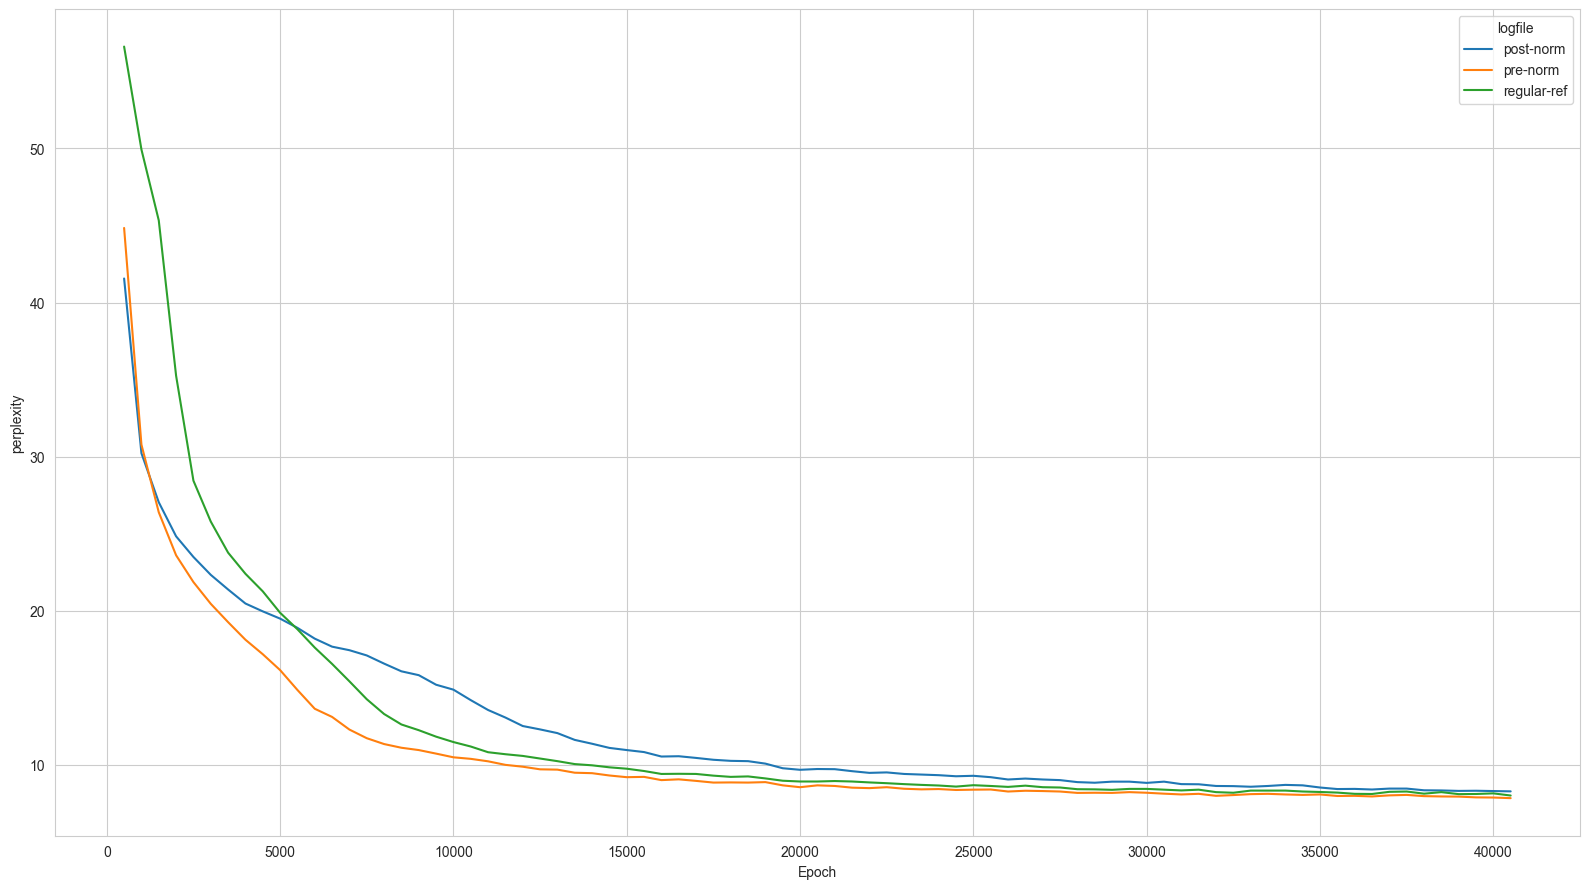

In [70]:
sns.set_style("whitegrid")
fig,ax = plt.subplots(figsize=(16,9))
# plot perplexity over steps
sns.lineplot(x = "step", y = "perplexity",hue = "logfile",data = ppl_dfs,ax=ax)
ax.set_xlabel("Epoch")
plt.tight_layout()
plt.show()

In [76]:
table = ppl_dfs.pivot(index="step", columns="logfile", values="perplexity")
table.reset_index(inplace=True)
print(table)


logfile   step  post-norm  pre-norm  regular-ref
0          500      41.56     44.84        56.61
1         1000      30.22     30.78        49.93
2         1500      27.04     26.39        45.33
3         2000      24.83     23.60        35.25
4         2500      23.49     21.86        28.44
..         ...        ...       ...          ...
76       38500       8.34      7.95         8.23
77       39000       8.31      7.94         8.10
78       39500       8.32      7.89         8.11
79       40000       8.30      7.88         8.15
80       40500       8.28      7.84         8.01

[81 rows x 4 columns]


In [85]:
from tabulate import tabulate

column_names = ["Validation ppl", "Baseline", "Prenorm", "Postnorm"]
table_txt = tabulate(table, headers=column_names, tablefmt='pipe', showindex=False)

with open("colab/analysis", "w") as f:
    f.write(table_txt)